In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Start

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,12.22,87,75,2.57,PT,1679699005
1,cape town,-33.9258,18.4232,18.82,82,40,7.20,ZA,1679698800
2,belmonte,-15.8631,-38.8828,25.49,83,8,3.83,BR,1679699005
3,hithadhoo,-0.6000,73.0833,26.88,78,100,1.25,MV,1679699006
4,new norfolk,-42.7826,147.0587,15.40,52,78,0.45,AU,1679699006
...,...,...,...,...,...,...,...,...,...
557,thohoyandou,-22.9456,30.4850,17.77,83,78,1.07,ZA,1679699285
558,abeokuta,7.1500,3.3500,26.78,79,99,2.99,NG,1679699285
559,north bend,43.4065,-124.2243,8.93,76,100,4.63,US,1679699117


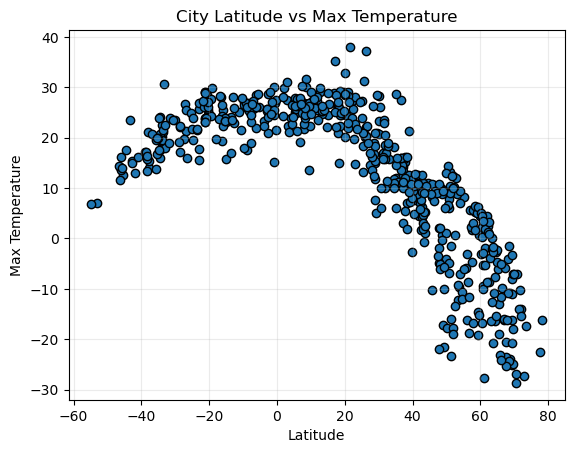

In [4]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor = 'black')
plt.grid(alpha = 0.25)
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

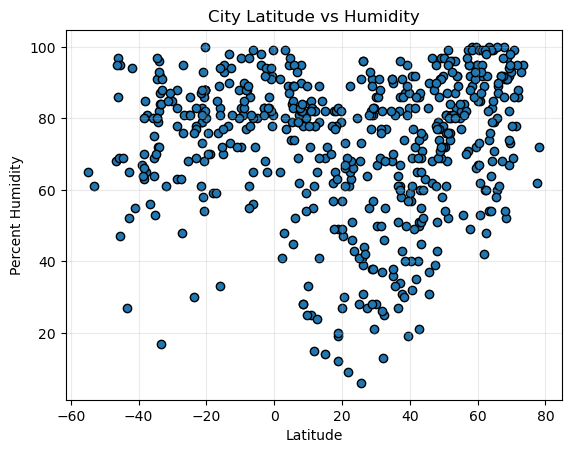

In [5]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor = 'black')
plt.grid(alpha = 0.25)
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Percent Humidity')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

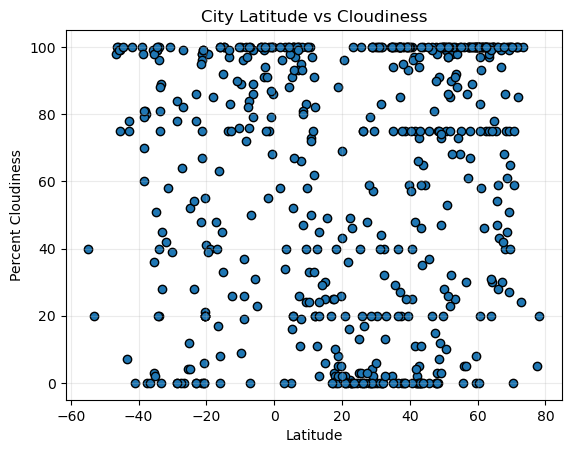

In [6]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor = 'black')
plt.grid(alpha = 0.25)
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Percent Cloudiness')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

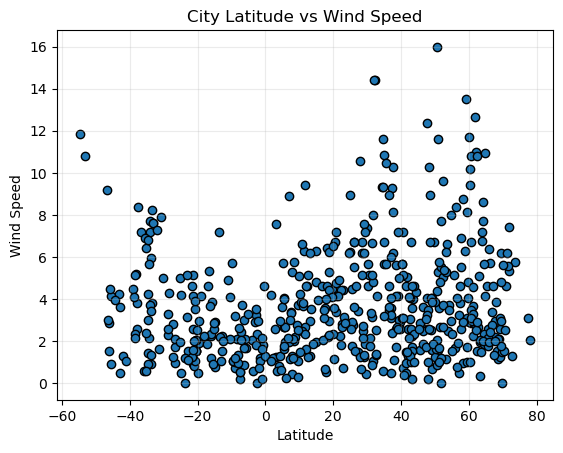

In [7]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor = 'black')
plt.grid(alpha = 0.25)
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [3]:
# Define a function to create Linear Regression plots
def linreg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    
    regress_values = x*slope + intercept
    lin_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x,y)
    
    plt.annotate(lin_eq,(float(input('Annotate x position: ')),float(input('Annotate y position: ')))
                 ,fontsize = 15, color = 'red')
    plt.plot(x,regress_values,"red")
    
    plt.xlabel(input("X label: "))
    plt.ylabel(input("Y label: "))
    
    print(f"The r-value is: {rvalue}")

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,12.22,87,75,2.57,PT,1679699005
5,korla,41.7597,86.1469,7.48,35,0,5.02,CN,1679699006
7,cherskiy,68.7500,161.3000,-24.01,91,61,1.14,RU,1679699007
8,qasigiannguit,68.8193,-51.1922,-10.86,97,100,2.09,GL,1679699008
10,viseu,40.6610,-7.9097,7.63,92,25,0.72,PT,1679699008


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cape town,-33.9258,18.4232,18.82,82,40,7.20,ZA,1679698800
2,belmonte,-15.8631,-38.8828,25.49,83,8,3.83,BR,1679699005
3,hithadhoo,-0.6000,73.0833,26.88,78,100,1.25,MV,1679699006
4,new norfolk,-42.7826,147.0587,15.40,52,78,0.45,AU,1679699006
6,busselton,-33.6500,115.3333,18.25,84,81,5.95,AU,1679699007


Annotate x position: 10
Annotate y position:-20
X label: Latitude
Y label: Max Temperature
The r-value is: -0.877968176239711


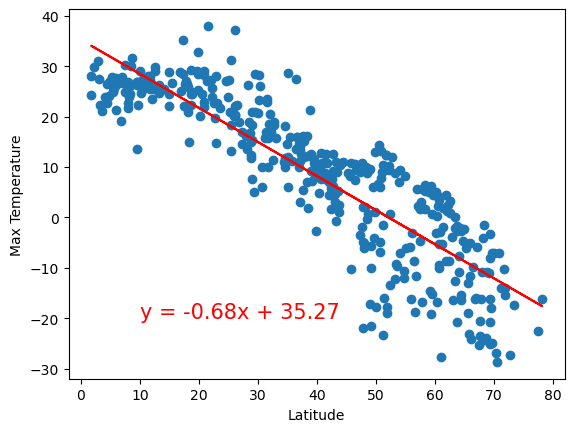

In [47]:
linreg(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

Annotate x position: -30
Annotate y position:10
X label: Latitude
Y label: Max Temperature
The r-value is: 0.6776520716594902


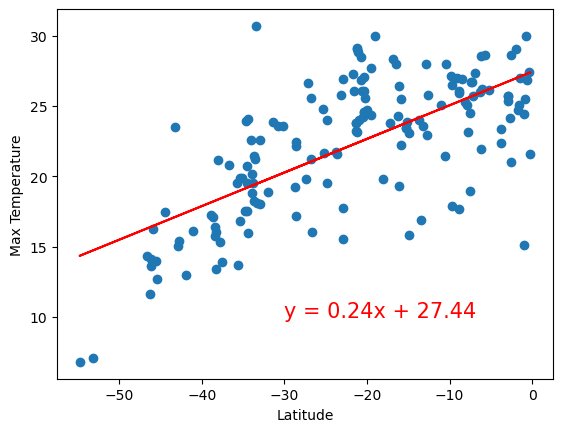

In [50]:
linreg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

Annotate x position40
Annotate y position15
X label: Latitude
Y label: Humidity
The r-value is: 0.27569836586778357


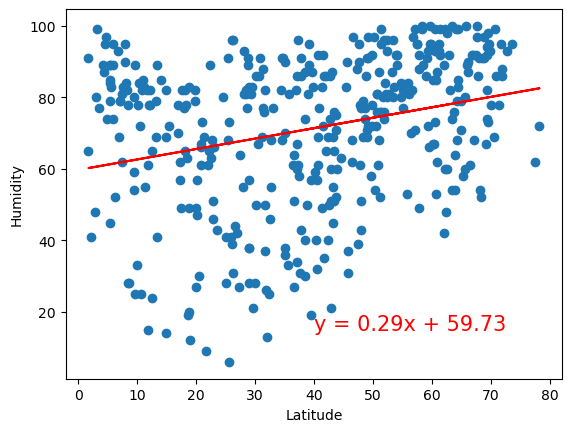

In [36]:
linreg(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

Annotate x position-50
Annotate y position18
X label: Latitude
Y label: Humidity
The r-value is: 0.2695258598336397


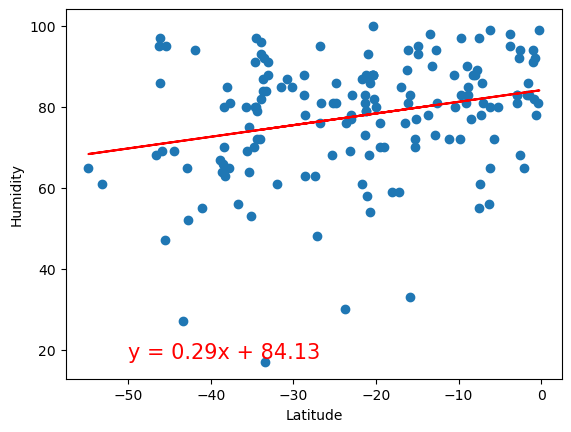

In [38]:
linreg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

Annotate x position: 40
Annotate y position:18
X label: Latitude
Y label: Cloudiness
The r-value is: 0.25054106396772796


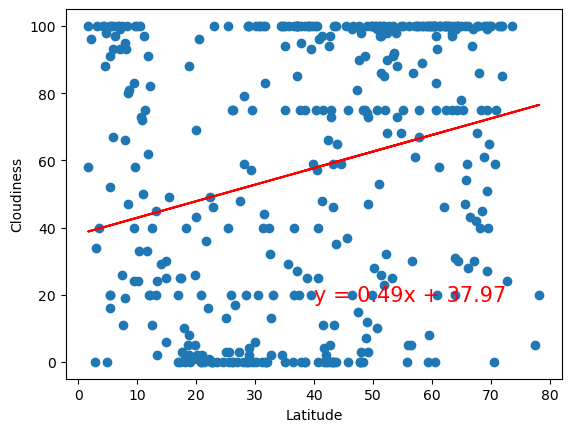

In [40]:
linreg(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

Annotate x position: -50
Annotate y position:20
X label: Latitude
Y label: Cloudiness
The r-value is: 0.1292534445006447


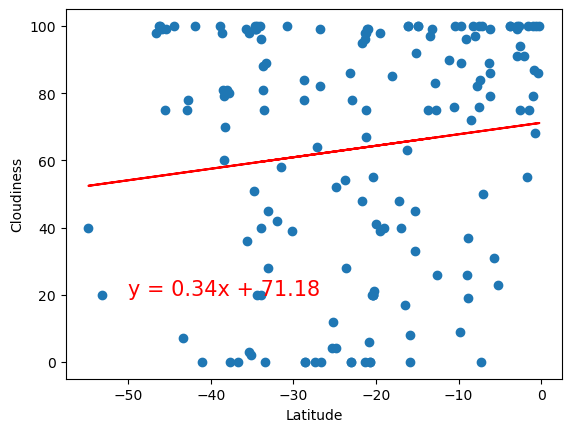

In [45]:
linreg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

Annotate x position: 10
Annotate y position:12
X label: Latitude
Y label: Wind Speed
The r-value is: 0.08656042179681374


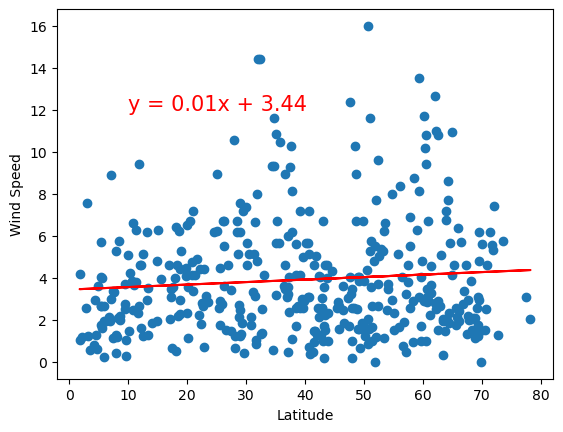

In [42]:
linreg(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

Annotate x position: -50
Annotate y position:10
X label: Latitude
Y label: Wind Speed
The r-value is: -0.43763142314452697


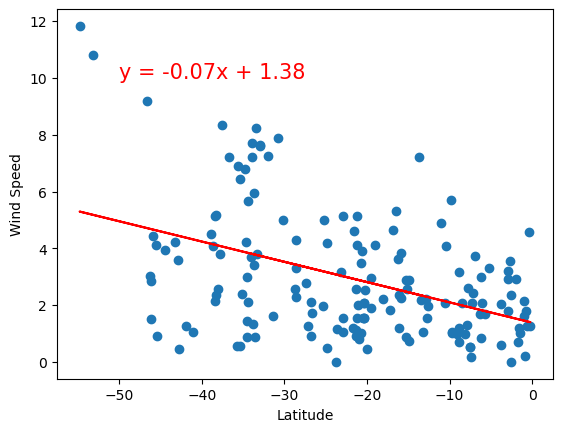

In [44]:
linreg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])